# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [3]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [4]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.data.shape

(506, 13)

In [7]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [9]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [10]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [11]:
print(boston.target.shape)

(506,)


In [12]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

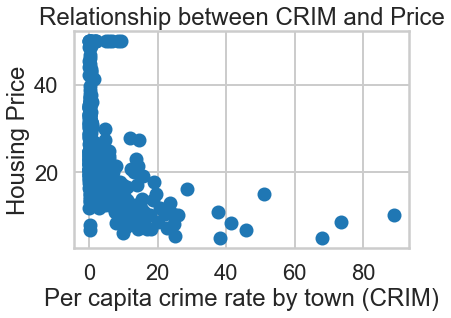

In [14]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [15]:
# your turn: describe relationship
print('Before removal of outliers')
print(bos[['CRIM', 'PRICE']].corr())
print('\n\nAfter removal of outliers')
z = np.abs(stats.zscore(bos['CRIM']))
bos['CRIM_zscore']=pd.DataFrame(z)
bos_crpr=bos[bos['CRIM_zscore']<3][['CRIM', 'PRICE']].reset_index(drop=True)
print(bos_crpr[['CRIM', 'PRICE']].corr())

Before removal of outliers
           CRIM     PRICE
CRIM   1.000000 -0.388305
PRICE -0.388305  1.000000


After removal of outliers
           CRIM     PRICE
CRIM   1.000000 -0.423837
PRICE -0.423837  1.000000


From the scatter plot, we can see the realtionship between CRIM and PRICE have 'negative' rlationship. The relation is non-linear. Large population of the data are for low value of CRIM which is not surprising because every body wants to buy houses in the region with no crimes. We have confirmed the negative relationship between the CRIM and PRICE by calculating the correlation coefficient which is -0.388305. We expect that the crime rate strongly correlates to the price, but -0.38 shows the linear correlation is moderate. This is due to the non-linearity on the relationship and somewhat due to outliers. We detected some outliers and removed the outliers and plotted the scatter plot. The correlation coefficients are calculated after removal of the outliers which changes the value of the correlation coefficient from -0.38 to -0.42. Again, the correlation coefficient is moderately linear, i.e. related nonlinearly. 

Outliers can be detected by several methods. One method is by using the Z-score. Z-score is the number of standard deviations by which the observation is off from the mean. Generally, the datapoints which are less than the Z-score< -3 or > 3 are considered as outliers. 

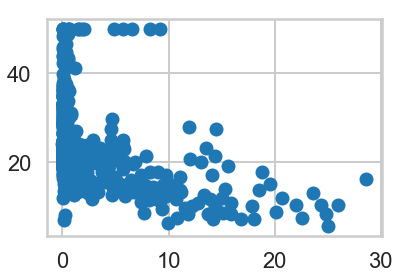

In [16]:

plt.scatter(bos_crpr.CRIM, bos_crpr.PRICE)

We can remove the outliers and keep only the data without outliers.

In [17]:
np.where(z<3);

Text(0.5, 1.0, 'Relationship between RM and Price')

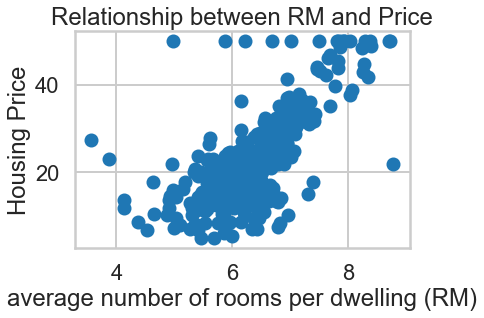

In [18]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

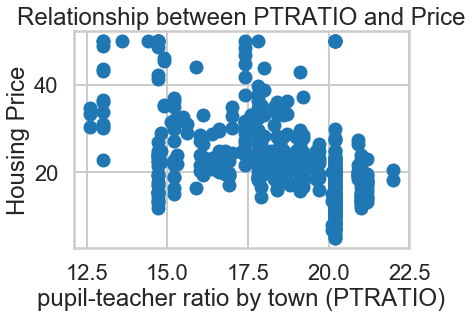

In [19]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

In [20]:
# your turn: create some other scatter plots

Some other important features can be listed as: 

    AGE      proportion of owner-occupied units built prior to 1940
    
    DIS      weighted distances to five Boston employment centres
    
    TAX      full-value property-tax rate per $10,000
    
    LSTAT    % lower status of the population

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

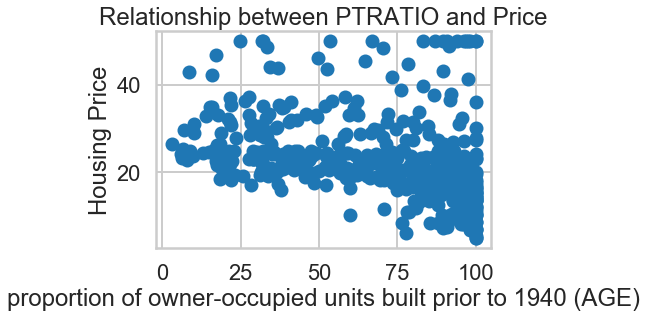

In [21]:
#Scatter plot between AGE and PRICE:
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("proportion of owner-occupied units built prior to 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

The price of houses slightly decreases linearly on increasing the AGE of the houses. Also, cheaper houses seem to be affected more by the feature 'AGE'

Text(0.5, 1.0, 'Relationship between DIS and Price')

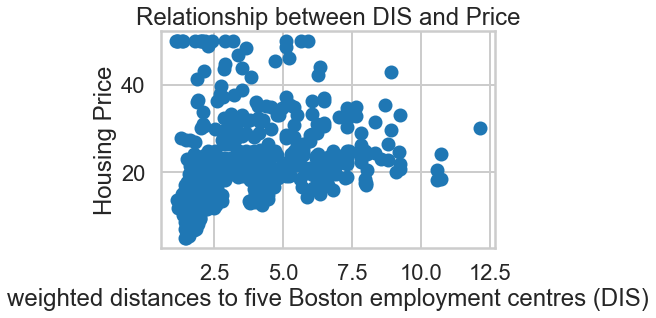

In [22]:
#Scatter plot between DIS and PRICE:
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("weighted distances to five Boston employment centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

It shows the non-linearity of the Price with the distance to five Boston employment centers (DIS). Majority of the data shows low price for closer distance although there are some outliers with high price at closer distance from the five employment cdenters. 

Text(0.5, 1.0, 'Relationship between TAX and Price')

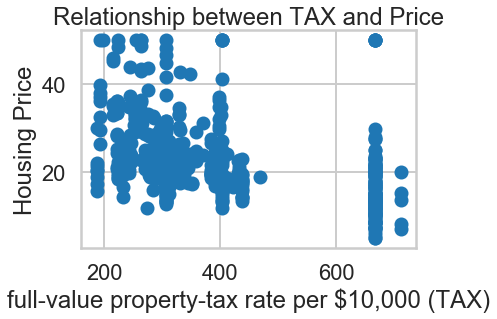

In [23]:
#Scatter plot between TAX and PRICE:
plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel("full-value property-tax rate per $10,000 (TAX)")
plt.ylabel("Housing Price")
plt.title("Relationship between TAX and Price")

The scatter plot of Price against TAX shows that increasing the full-value property tax causes decreasing the price of the housing.
The ihcreased tax value should cause the increase of the total price. But, it seems to decrease. But, from the plot it shows the decrease of price on increasig the tax. This must be due to decrease of demand. 

Text(0.5, 1.0, 'Relationship between LSTAT and Price')

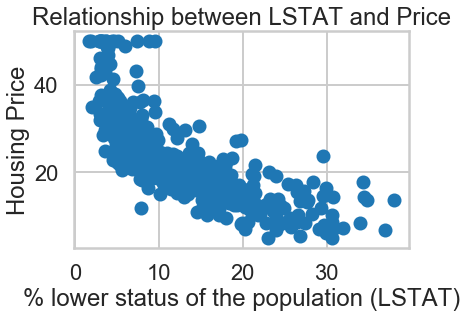

In [24]:
 #Scatter plot between LSTAT and PRICE:
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

The plot of % lower status of population to housing price is clearly non-linear with negative correlation. The plot contains no outliers. The majority lower status of the population causes the decreased price which is not different than the general intuition.  

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


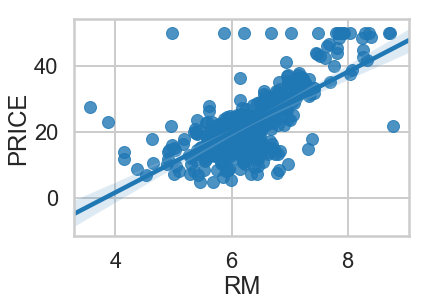

In [25]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


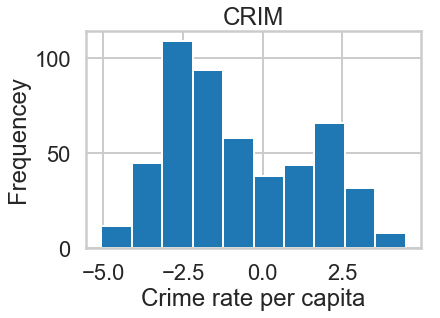

In [26]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

In [27]:
#your turn

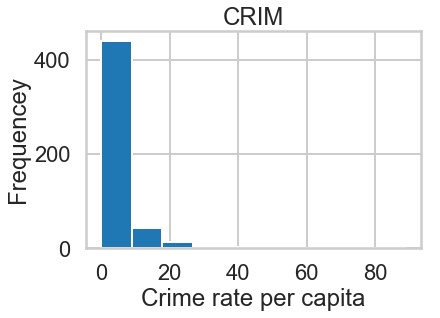

In [28]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

The histogram shows most of the data populated in between 0 to 20. Since there are some points upto 80. By taking the log, the visualization will be more clear. It will shrinks the x-scale which will help us to visualze the small counts for larger range. Also, it makes easier to see that the majority of data points are for crime rate from 0 to 1.  

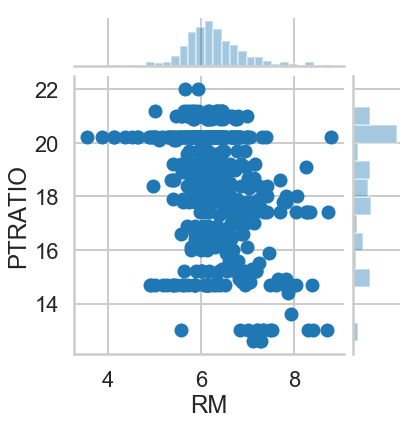

In [29]:
sns.jointplot(x=bos.RM, y=bos.PTRATIO, kind='scatter')

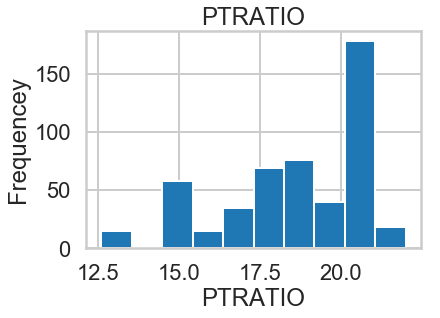

In [30]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("PTRATIO")
plt.ylabel("Frequencey")
plt.show()

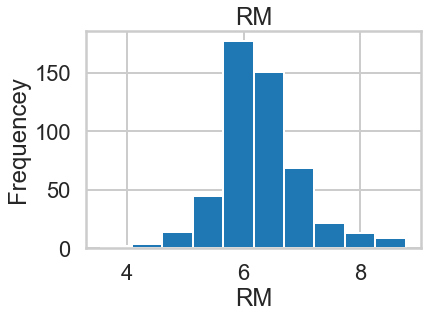

In [31]:
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("RM")
plt.ylabel("Frequencey")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [32]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [33]:
# your turn
m = ols('PRICE ~ RM + PTRATIO + CRIM + DIS+AGE + B + LSTAT + INDUS + TAX+ NOX+RAD+ZN' , bos).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sun, 17 Nov 2019   Prob (F-statistic):          7.30e-134
Time:                        17:58:40   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8920      5.147      7.168      0.000      26.780      47.004
RM             3.8505      0.421      9.137      0.000       3.023       4.678
PTRATIO       -0.9910      0.131     -7.542      0.000      -1.249      -0.733
CRIM          -0.1131      0.033     -3.417      0.001      -0.178      -0.048
DIS           -1.4854      0.201     -7.383      0.000      -1.881      -1.090
AGE            0.0028      0.013      0.209      0.834      -0.023       0.029
B              0.0097      0.003      3.600      0.000       0.004       0.015
LSTAT         -0.5342      0.051    -10.459      0.000      -0.635      -0.434
INDUS          0.0403      0.062      0.653      0.514      -0.081       0.162
TAX           -0.0138      0.004     -3.653      0.000      -0.021      -0.006
NOX          -17.3670      3.851     -4.509      0.000     -24.934      -9.800
RAD            0.3283      0.067      4.934      0.000       0.198       0.459
ZN             0.0471      0.014      3.398      0.001       0.020       0.074
==============================================================================
Omnibus:                      190.856   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.352
Skew:                           1.619   Prob(JB):                    8.42e-196
Kurtosis:                       8.668   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Predicted Price')

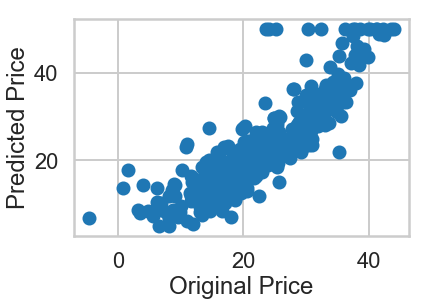

In [34]:
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')

The plot seems linear with slope 1 that means predicted price ~ original price. But, at 'Original Pirce'=50, predicted value is not stable. This, probably, is due to the outlier points. If we remove all the outliers in all the features and then fit the unstability may be removed. 

### Fitting Linear Regression using `sklearn`


In [35]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [36]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [66]:
# your turn
lm1=LinearRegression(fit_intercept=False)
lm1.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

No. I would not recommend to set intercept equal to zero unless the target must pass through origin as established by theory. It is because the intercept represents the constant base value of the target. Setting intercept zero will bias the effect of other features even if the real value of intercept is close to but significantly different from zero. 

The residuas must be independently and identically distribtued. If the data are distributed normally then they are inependent and identical. 
Also, the variance of the residuals for all explanatory variables should be same. 

False. Neither the explanatory variables nor the outcomes (response variables) should be distributed normally. Only the error calculated after prediction should follow normal distribution if we want to apply hypothesis testinig based on normal distribution such as z or t-test. 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [67]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 39.36989805746832


In [68]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 14


In [69]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,0.421987
1,ZN,0.044932
2,INDUS,-0.000883
3,CHAS,2.672272
4,NOX,-21.268296
5,RM,3.868286
6,AGE,-0.000805
7,DIS,-1.505235
8,RAD,0.173626
9,TAX,-0.012433


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [70]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00579854, 25.14506563, 30.74684576, 28.82157735, 28.19895271])

In [71]:
m = lm.predict(X)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

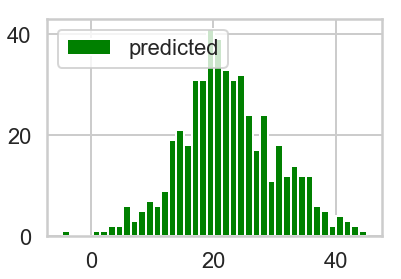

In [74]:
# your turn
plt.figure(figsize=(6,4))
plt.hist(m, bins=40, label='predicted', color='g')
plt.legend(loc=2)

The distribution of the predicted price is almost normal centered at around 20. There are outliers which are the points less than zero. The price less than zero should not be accepted. These are outlier points. These are may be due to the outliers in the input variables.

We will try to remove the outliers in the independent variables. We will remove the outliers not by dropping but by transforming with various transformation formulae.  

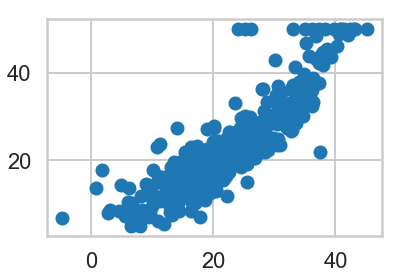

In [75]:
plt.figure(figsize=(6,4))
plt.scatter(x=m, y=bos.PRICE)

Although the data points are distributed around the line with slope 1, there is large variation of residulas. This prediction has a large number of outliers. 

In [76]:
pd.DataFrame(m).describe()

,0
count,506.000000
mean,22.532806
std,7.925614
min,-4.690393
25%,17.446373
50%,21.984287
75%,27.631420
max,45.086344


sklearn is easier for final modeling. Sklearn giving more emphasis on the predicting functionality. The statmodels oriented to explain traditional statistics. statmodels has method like .summary() which prints all the statistics (including distribution parameters to test statistics and fitting coefficients)in one command. In Sklearn, one has to print these quantities with different commands separately.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [77]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

10994.541467773583


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [78]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31721.75394724623


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [79]:
# your turn
lmpt=LinearRegression()
X1= X['PTRATIO'].values.reshape(-1, 1)
lmpt.fit(X1, bos.PRICE)
print(lmpt.intercept_)
print(lmpt.coef_)
ypred=lmpt.predict(X1)

62.344627474832606
[-2.1571753]


In [80]:
rss=np.sum((bos.PRICE - ypred)** 2)
ess=np.sum((ypred - np.mean(bos.PRICE))**2)
print('R_square:',ess/(rss+ess))

R_square: 0.25784731800922234


The value of $R^2$ is very small which means the linear fit using only PTRATIO does not predict the price of houses correctly.

In [81]:
mse=rss/(len(bos)-2)
msr=ess/1
Fscore=msr/mse
print('F_score: ', Fscore)

F_score:  175.1055428756949


The F_score is large, so we can not accept the null hypothesis. Here, the fit with the variable is same as the fit only with intercept.  Therefore, the fit with the variable is significant. 

t-test can take only one regression coefficient at a time F-test take multiple regression coefficients at the same time.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [82]:
n = len(bos)
k= 3

# your turn
X2=X[['CRIM','RM', 'PTRATIO']]
lmpt.fit(X2, bos.PRICE)
print(lmpt.intercept_)
print(lmpt.coef_)
y2pred=lmpt.predict(X2)

rss=np.sum((bos.PRICE - y2pred)** 2)
ess=np.sum((y2pred - np.mean(bos.PRICE))**2)
R_square = ess/(rss+ess)
print('R_square:',R_square)

mse=rss/(n-k-1)
msr=ess/k
Fscore=msr/mse
print('F_score: ', Fscore)

#F_score1=(R_square/(1-R_square))*((n-k-1)/(k))
#print('F_score: ', F_score1)

-3.3707043351542403
[-0.20496083  7.3804111  -1.0695461 ]
R_square: 0.5943412940723469
F_score:  245.1644903006461


This Large F_score forces us to reject 'the null hypothesis that the distribution of all coefficients are same'. So, the effect of the variables are significant. 

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [83]:
n = len(bos)
k= 5

# your turn
X2=X[['CRIM','RM', 'PTRATIO', 'AGE', 'B', 'LSTAT']]
lmpt.fit(X2, bos.PRICE)
print(lmpt.intercept_)
print(lmpt.coef_)
y2pred=lmpt.predict(X2)

rss=np.sum((bos.PRICE - y2pred)** 2)
ess=np.sum((y2pred - np.mean(bos.PRICE))**2)
R_square = ess/(rss+ess)
print('R_square:',R_square)

mse=rss/(n-k-1)
msr=ess/k
Fscore=msr/mse
print('F_score: ', Fscore)

#F_score1=(R_square/(1-R_square))*((n-k-1)/(k))
#print('F_score: ', F_score1)

12.229152420282215
[-0.04322793  4.62559834 -0.89291689  0.01923039  0.00969694 -0.54599018]
R_square: 0.6907821741405197
F_score:  223.3966208838282



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [84]:
m = ols('PRICE ~ RM + PTRATIO + CRIM + DIS+AGE + B + LSTAT + INDUS + TAX+ NOX+RAD+ZN' , bos).fit()
y_fitted = m.fittedvalues

Text(0.5, 1.0, 'Residual Plot')

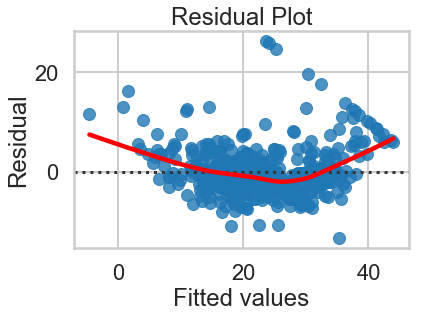

In [85]:
# Your turn
sns.residplot(y_fitted, bos.PRICE, lowess=True, line_kws={'color':'red'})
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')

Assumption for the linear regression to hold currectly are: (i) the variations of the residuals should be constant. (ii) The residuals shoould be distributed randomly around zero. From the plot we have seen the residuals distributed randomly around the zero but the variances are not constant over the range of the fitted values. Our data pattern shows that it doesn't meet the assumptions for the ideal model of linear regression. 

Text(0.5, 1.0, 'QQ plot')

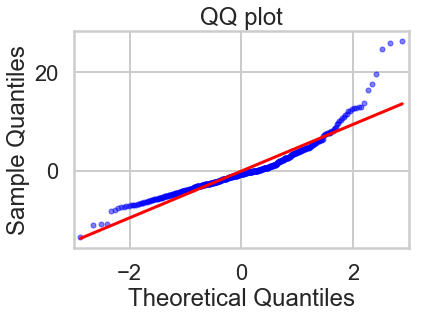

In [86]:
QQ = sm.ProbPlot(m.resid)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot')

quantile plot shows the homoscedasticity of the data. The data points in the plot if follow the red line drawn with slope 1, then we can assure the normal distribution. This plot tells us that few data points are off from the normal distribution. 

The residual plot helps to analyze all distribution in the same standardized scale. This method is one strong graphical method to detect the outliers. Eventhough the datasets are non-normal, the residuals are normally distributed. Disadvantage of the residual plot is that if the response variables distributed non-linearly with respect to the predictor varibales, then the residual data are biased and inappropriate regardless how big is the sample size. 
QQ plot is appropriate for the data sets with different samples sizes. Two different datasets can be tested simultaneously. QQ plot based on sorting the data points, so it takes long time to calculate the data points which is main disadvantage of the QQ plot. 

The points which are corresponding to the larger values of residuals are identified as the outliers. From the influence plot we easily find out outliers. The indices for each points are labeled in the area type plot as shown above. Generally, all the data points corresponding to the studentized residuals greater than 3 and lower htan -3 are taken to be outliers. 

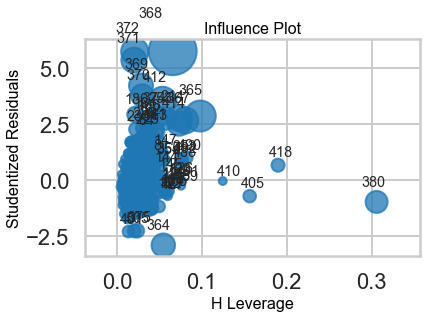

In [87]:
fig, ax = plt.subplots(figsize=(6,4))
fig = sm.graphics.influence_plot(m, alpha  = 0.05, ax=ax, criterion="cooks")

Fron the influence plot we found that there are few points (410, 405, 418 and 380) are outliers with large value of leverage. 

We can identify the outliers from the influence points where the residuals have the large values. Generally the outliers have z-value |z| > 3. We will remove all the outliers from the data and fit it. The diagnostic plots will also be plotted. 

In [88]:
#Removal of the outliers:
bos_new=bos.drop([368, 372,371, 369, 370,412, 367,365, 364, 401,374,414,407,161,162,166,186,366,157,163])
m_new=ols('PRICE ~ RM + PTRATIO + CRIM + DIS+AGE + B + LSTAT + INDUS + TAX+ NOX+RAD+ZN' , bos_new).fit()
ynew_fitted=m_new.fittedvalues

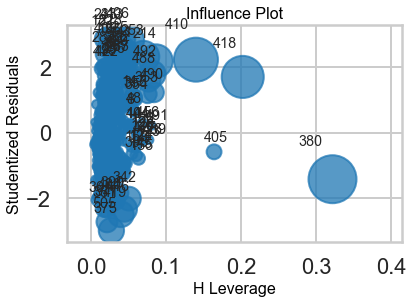

In [90]:
fig, ax = plt.subplots(figsize=(6,4))
fig = sm.graphics.influence_plot(m_new, alpha  = 0.05, ax=ax, criterion="cooks")

Text(0.5, 1.0, 'Residual Plot')

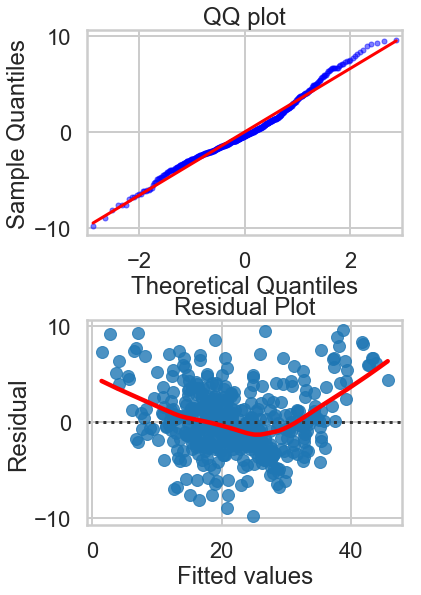

In [92]:
fig,ax=plt.subplots(2,1, figsize=(6,8))
QQ = sm.ProbPlot(m_new.resid)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s', ax=ax[0])
ax[0].set_title('QQ plot')
plt.tight_layout()
sns.residplot(ynew_fitted, bos_new.PRICE, lowess=True, line_kws={'color':'red'}, ax=ax[1])
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')

After removing the outliers, the residual and qq plots are better with less fluctuation from the regression line. From the residual plot it seems the data are still with some pattern of shallow 'v' shaped.